In [1]:
! export PYORBFIT_HOME=/phys/users/brycek/epyc/users/brycek/pyOrbfit #/Users/gerdes/TNO/pyOrbfit

! export LD_LIBRARY_PATH=$LD_LIBRARY_PATH:$PYORBFIT_HOME
! export C_INCLUDE_PATH=$C_INCLUDE_PATH:$PYORBFIT_HOME
! export PATH=$PATH:$PYORBFIT_HOME
! export PYTHONPATH=$PYTHONPATH:$PYORBFIT_HOME

! export ORBIT_EPHEMERIS=$PYORBFIT_HOME/binEphem.423
! export ORBIT_OBSERVATORIES=$PYORBFIT_HOME/observatories.dat

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from ephem_utils import ephem_utils
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [3]:
convertfunc_1 = lambda x: x[1:]
convertfunc_2 = lambda x: x[:-1]
results = pd.DataFrame(np.genfromtxt('found_objects.csv', delimiter=',', 
                        usecols=(0,1,2,3,4,5,6), names=True,
                        dtype=['i8', 'U8', 'U8', 'i8', 'i8', 'f8', 'f8'],
                        converters={1: convertfunc_1, 2: convertfunc_2}))

In [4]:
#os.environ['ORBIT_EPHEMERIS'] = '../analysis/pyOrbfit/binEphem.423'
#os.environ['ORBIT_EPHEMERIS'] = 'asc_cat.405'
#os.environ['ORBIT_OBSERVATORIES'] = '../analysis/pyOrbfit/observatories.dat'

In [5]:
results.head()

,tract,patch_horizontal,patch_vertical,x0,y0,x_vel,y_vel
0,0,2,4,1622,1500,214.204620,81.383980
1,3,4,4,987,1135,472.435577,223.248917
2,5,5,3,3496,1607,216.298416,94.617867
3,7,4,6,1243,1021,238.136871,76.018631
4,7,4,6,3047,3182,226.968872,100.539658


In [6]:
ep = ephem_utils(results.iloc[0])

In [7]:
ep.get_searched_radec('v410908-fg.fits')

In [8]:
ep.format_results_mpc()

     c111112  c2015 02 17.13129 09 39 43.811-04 34 59.54                     807
     c111112  c2015 02 17.21672 09 39 43.403-04 34 57.24                     807
     c111112  c2015 02 17.28545 09 39 43.075-04 34 55.38                     807
     c111112  c2015 02 17.33246 09 39 42.851-04 34 54.11                     807
     c111112  c2015 02 18.06011 09 39 39.378-04 34 34.46                     807
     c111112  c2015 02 18.12787 09 39 39.055-04 34 32.63                     807
     c111112  c2015 02 18.19553 09 39 38.732-04 34 30.80                     807
     c111112  c2015 02 18.26566 09 39 38.397-04 34 28.91                     807
     c111112  c2015 02 18.33465 09 39 38.068-04 34 27.04                     807
     c111112  c2015 02 19.05684 09 39 34.621-04 34 07.54                     807
     c111112  c2015 02 19.19379 09 39 33.967-04 34 03.84                     807
     c111112  c2015 02 19.26247 09 39 33.640-04 34 01.99                     807
     c111112  c2015 02 19.33

In [9]:
ep.coords, ep.mjd_0

(<SkyCoord (ICRS): (ra, dec) in deg
     [(144.93254492, -4.58320627), (144.93084609, -4.58256544),
      (144.92947944, -4.58204992), (144.92854456, -4.58169726),
      (144.91407473, -4.57623873), (144.91272722, -4.57573038),
      (144.91138173, -4.57522279), (144.90998711, -4.57469666),
      (144.90861531, -4.57417914), (144.89425425, -4.56876112),
      (144.89153095, -4.56773366), (144.89016535, -4.56721843),
      (144.88878989, -4.56669948)]>, 57070.131292699996)

In [ ]:
date_range = np.arange(ep.mjd_0-100., ep.mjd_0+100., 1.0)
pred_ra, pred_dec = ep.predict_ephemeris(date_range)

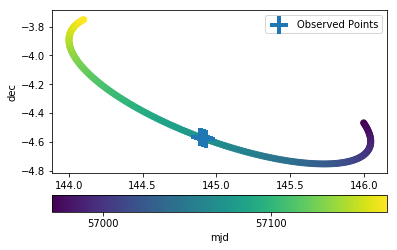

In [44]:
fig = ep.plot_predictions(date_range)

In [45]:
ep.predict_pixels('v410908-fg.fits', np.arange(ep.mjd_0, ep.mjd_0+2, 0.2))

[array([1621.75449862, 1665.33472159, 1708.28542919, 1750.55071621,
        1793.0023074 , 1836.22805049, 1879.71460852, 1922.55930613,
        1964.72263465, 2007.08211544]),
 array([1500.5134307 , 1516.53621881, 1532.65285142, 1548.78841077,
        1564.91683423, 1581.09670646, 1597.38952937, 1613.77399229,
        1630.1752466 , 1646.56847296])]

In [46]:
el, err, o = ep.predict_elements()

In [47]:
el, err

({'a': 39.15670620914564,
  'aop': 107.02532968774781,
  'e': 0.045121746837225314,
  'i': 17.887022180244585,
  'lan': 221.31291844418956,
  'top': 2412443.5156715363},
 {'a': 19.50200034494426,
  'aop': 723.5156519930802,
  'e': 0.5814316452720948,
  'i': 0.6249671695544053,
  'lan': 6.5208070690083,
  'top': 179749.6170584311})